<a href="https://colab.research.google.com/github/FS-Tamim/City-Life-Cycle-Open-GL-project/blob/main/3_EDA_Hostility_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset_Name='/content/drive/MyDrive/Colab Notebooks/NLP Project/Thesis_Hostality _Detection/Hostility_dataset - Hostility_Dataset_main_suffeld.csv'
df = pd.read_csv(dataset_Name)
df=df.dropna()
df.head()


,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm
0,5515,এটাই তো এখনার জুগের মেয়েরা বুঝে না যে তাদের ...,1,1,1,0,0,0
1,10492,: একটা দেশের মন্ত্রী কতো টা নির্লজ্জ হলে এমন ...,0,0,0,0,0,0
2,7219,"আজকের এই পবিত্র দিনে তোরে গালি দিলাম না , ঈদট...",1,1,0,0,0,1
3,10353,আজব একটা মানুষ তুমি ! দুঃখের গল্প বললেও তুমি ...,0,0,0,0,0,0
4,9216,আপনাকে সামনে থেকে দেখলে একটু সালাম করতাম,0,0,0,0,0,0


In [4]:
print( df.dtypes)

id                      int64
Text                   object
Hostile/Non-Hostile     int64
offensive               int64
Hate speech             int64
threat                  int64
defamation              int64
sarcasm                 int64
dtype: object


In [5]:
df.isnull().values.any()

False

In [6]:
print("Total number of Text extracted from dataset are =",len(df))

Total number of Text extracted from dataset are = 10535


In [7]:
print('Average Text length: ', df.Text.str.split().str.len().mean())
print('Stdev Text length: ', df.Text.str.split().str.len().std())

Average Text length:  13.081822496440436
Stdev Text length:  12.066305758990934


In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
df

,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm
0,5515,এটাই তো এখনার জুগের মেয়েরা বুঝে না যে তাদের ...,1,1,1,0,0,0
1,10492,: একটা দেশের মন্ত্রী কতো টা নির্লজ্জ হলে এমন ...,0,0,0,0,0,0
2,7219,"আজকের এই পবিত্র দিনে তোরে গালি দিলাম না , ঈদট...",1,1,0,0,0,1
3,10353,আজব একটা মানুষ তুমি ! দুঃখের গল্প বললেও তুমি ...,0,0,0,0,0,0
4,9216,আপনাকে সামনে থেকে দেখলে একটু সালাম করতাম,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
10530,10121,হ্যাপি জদি রাজি থাকে আমি বিয়া করতে রাজি আছি প্...,0,0,0,0,0,0
10531,4641,হ্যেকার গ্রুপ কি ওর মায়্রপ চুদতে চাইসিলো,1,1,0,0,1,0
10532,7444,হ্লাত প্রতিবন্ধী হয়ে গেছে! ওরে কেউ এক সামুচ গু...,1,1,0,0,0,1
10533,7495,হ্লাপুত তুই এই দুইটা কি হোগা ম্রা কোটায় পাইছত?,1,1,0,0,0,1


In [11]:
with open('/content/drive/MyDrive/Colab Notebooks/NLP Project/Thesis_Hostality _Detection/Hostility_dataset - Hostility_Dataset_main_suffeld.csv', 'r') as f:
    contents = f.read()
    words = contents.split()
    num_words = len(words)
print("Total number of words in the dataset:", num_words)

with open('/content/drive/MyDrive/Colab Notebooks/NLP Project/Thesis_Hostality _Detection/Hostility_dataset - Hostility_Dataset_main_suffeld.csv', 'r') as f:
    contents = f.read()
    words = contents.split()
    unique_words = set(words)
    num_unique_words = len(unique_words)
print("Total number of unique words in the dataset:", num_unique_words)

import os
size_bytes = os.path.getsize('/content/drive/MyDrive/Colab Notebooks/NLP Project/Thesis_Hostality _Detection/Hostility_dataset - Hostility_Dataset_main_suffeld.csv')
size_mb = size_bytes / (1024 * 1024)
print("Size of the dataset in MB:", size_mb)


Total number of words in the dataset: 138200
Total number of unique words in the dataset: 42651
Size of the dataset in MB: 2.1530046463012695


In [12]:
cols = df.columns
cols = list(df.columns)
classes = cols[2:8]
num_labels = len(classes)
print('Mesh Labels Root Class: "\n"',classes)
print("\n")
print('Number of Labels: ' ,num_labels)

Mesh Labels Root Class: "
" ['Hostile/Non-Hostile', 'offensive', 'Hate speech', 'threat', 'defamation', 'sarcasm']


Number of Labels:  6


**Dataset Statistics**


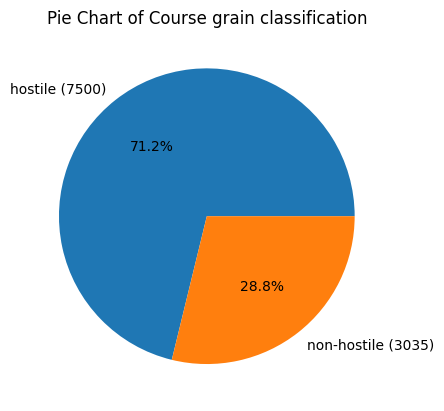

In [13]:
import matplotlib.pyplot as plt

# Select the column for which you want to create a pie chart
column_data = df['Hostile/Non-Hostile']

# Replace the labels
label_map = {1: 'hostile', 0: 'non-hostile'}
column_data = column_data.map(label_map)

# Count the frequency of each value in the column
value_counts = column_data.value_counts()

# Create a list of labels with count values
labels = []
for label in value_counts.index:
    count = value_counts[label]
    label_text = f'{label} ({count})'
    labels.append(label_text)

# Create a pie chart with custom labels
plt.pie(value_counts, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Pie Chart of Course grain classification')

# Display the chart
plt.show()

In [14]:
def single_class_post_distribution(dataset,classes):
  number_of_comments = []
  for labels in classes:
    number_of_comments.append((labels, dataset[labels].sum()))
  stats = pd.DataFrame(number_of_comments,columns = ['class','number of text'])
  return stats

In [15]:
stats = single_class_post_distribution(df,classes)
stats

,class,number of text
0,Hostile/Non-Hostile,7500
1,offensive,3530
2,Hate speech,2550
3,threat,1445
4,defamation,2355
5,sarcasm,2166


Text(0.5, 0, 'Classes')

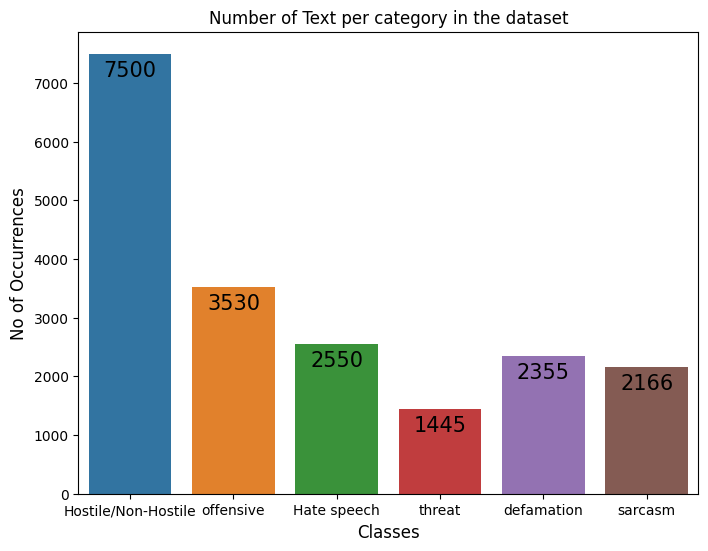

In [16]:
# Barplot
import seaborn as sns
plt.figure(figsize=(8,6))
splot = sns.barplot(x = 'class',y = 'number of text',data = stats)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.title("Number of Text per category in the dataset")
plt.ylabel('No of Occurrences', fontsize=12)
plt.xlabel('Classes', fontsize=12)

In [17]:
labelss = cols[3:8]
def single_class_post_distribution(dataset,classes):
  number_of_comments = []
  for labels in labelss:
    number_of_comments.append((labels, dataset[labels].sum()))
  stats = pd.DataFrame(number_of_comments,columns = ['class','number of text'])
  return stats

stats = single_class_post_distribution(df,classes)
# stats['key3'] = 'value3'

# Append the new dictionary element to the list
stats.loc[5,'class'] = 'Non-hostile'
stats.loc[5,'number of text'] = 3035

stats
print(type(stats))


<class 'pandas.core.frame.DataFrame'>


In [18]:
stats

,class,number of text
0,offensive,3530.0
1,Hate speech,2550.0
2,threat,1445.0
3,defamation,2355.0
4,sarcasm,2166.0
5,Non-hostile,3035.0


Text(0.5, 0, 'Classes')

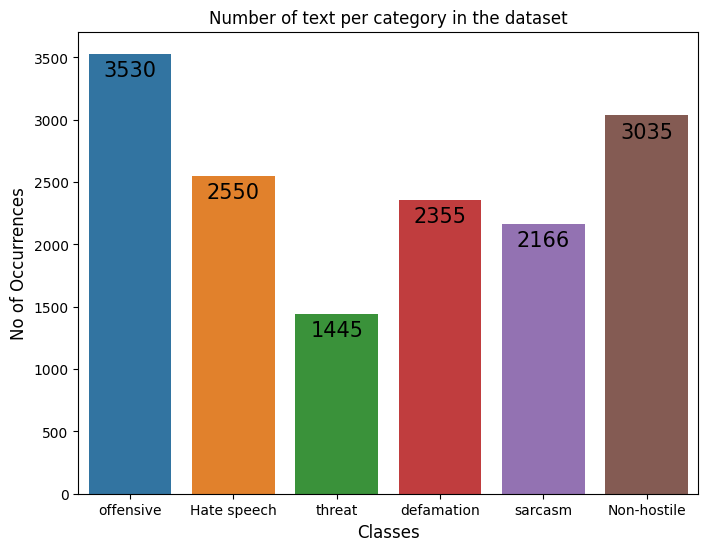

In [19]:
# Barplot
import seaborn as sns
plt.figure(figsize=(8,6))
splot = sns.barplot(x = 'class',y = 'number of text',data = stats)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.title("Number of text per category in the dataset")
plt.ylabel('No of Occurrences', fontsize=12)
plt.xlabel('Classes', fontsize=12)

**How many posts have multiple category ?**


In [20]:

def posts_with_multilabel (dataset,label):
  rowsums = dataset.iloc[:,1:8].sum(axis=1)
  x=rowsums.value_counts()
  df = pd.DataFrame(x.values,columns = ['number_of_posts'])
  #plot
  plt.figure(figsize=(8,6))
  splot = sns.barplot(x = df.index, y= 'number_of_posts',data = df)
  for p in splot.patches:
      splot.annotate(format(p.get_height(), '1.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
  plt.title(f"Multiple categories per post ({label} Set)")
  plt.ylabel('No of Occurrences', fontsize=12)
  plt.xlabel('No of categories', fontsize=12)

<ipython-input-20-83a891be0e63>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rowsums = dataset.iloc[:,1:8].sum(axis=1)


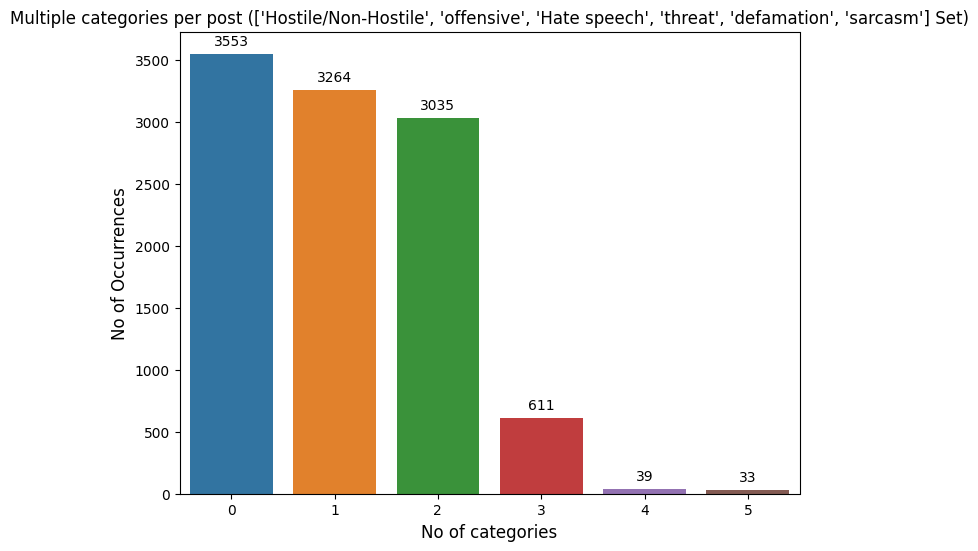

In [21]:
posts_with_multilabel (df,classes)

**Number of comments classified as classes depending on their lengths**

In [36]:
def comments_length_per_class(dataset,set_name):
  label = dataset[['Hostile/Non-Hostile', 'offensive', 'Hate speech', 'threat', 'defamation', 'sarcasm']]
  label = label.values
  comment = dataset['Text']
  comment = comment.values
  y = np.zeros(label.shape)
  for ix in range(comment.shape[0]):
      l = len(comment[ix])
      if label[ix][0] :
          y[ix][0] = l
      if label[ix][1] :
          y[ix][1] = l
      if label[ix][2] :
          y[ix][2] = l
      if label[ix][3] :
          y[ix][3] = l
      if label[ix][4] :
          y[ix][4] = l
      if label[ix][5] :
          y[ix][5] = l

  labelsplt = classes
  color = ['red','green','blue','yellow','chartreuse','orange']    
  bins = [1,50,100,150,200,250,300,350,400,450,500,550,600]    
  plt.title (f'Comments Length Per Class ({set_name} Set)')
  plt.hist(y,bins = bins,label = labelsplt,color = color)
  plt.axis([0, 550, 0, 3300])
  plt.xlabel('Length of Text')
  plt.ylabel('Number of Text') 
  plt.legend()
  plt.grid(True)
  plt.show()

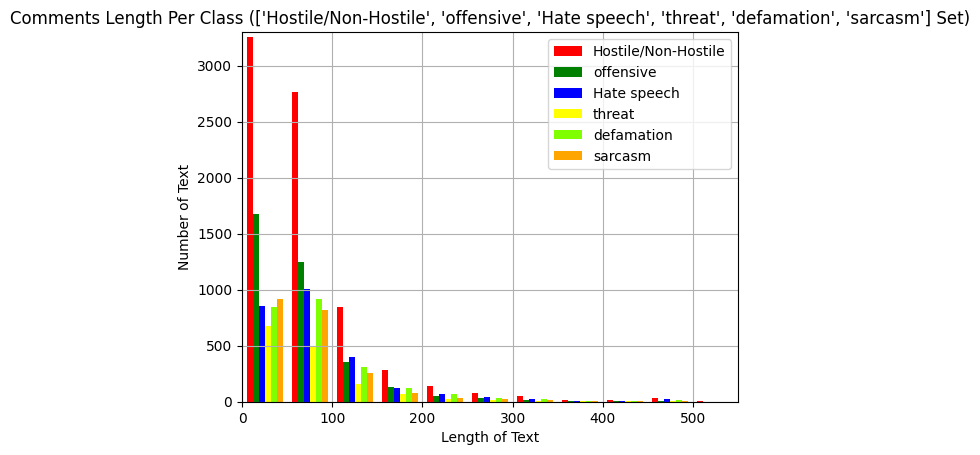

In [37]:
comments_length_per_class(df,classes)

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def comments_length_binary(dataset, set_name):
    # Get the labels and comments from the dataset
    labels = dataset['Hostile/Non-Hostile']
    comments = dataset['Text']
    
    # Create empty arrays to store the length of comments for each class
    non_hostile_lengths = []
    hostile_lengths = []
    
    # Iterate over all comments and their labels
    for comment, label in zip(comments, labels):
        # Calculate the length of the comment
        length = len(comment)
        
        # Append the length to the appropriate array based on the label
        if label == 0:
            non_hostile_lengths.append(length)
        else:
            hostile_lengths.append(length)
    
    # Create the histogram with 20 bins
    num_bins =[1,50,100,150,200,250,300,350,400,450,500,550,600]   
    plt.hist([ hostile_lengths,non_hostile_lengths], bins=num_bins, color=['blue', 'red'], label=['Non-Hostile', 'Hostile'])
    
    # Set the x-axis and y-axis labels, and the title of the plot
    plt.xlabel('Comment Length')
    plt.ylabel('Number of Comments')
    plt.title(f'Comment Lengths for Binary Classification ({set_name} set)')
    
    plt.axis([0, 550, 0, 3300])
    
    # Add a legend and grid to the plot, and show it
    plt.legend()
    plt.grid(True)
    plt.show()


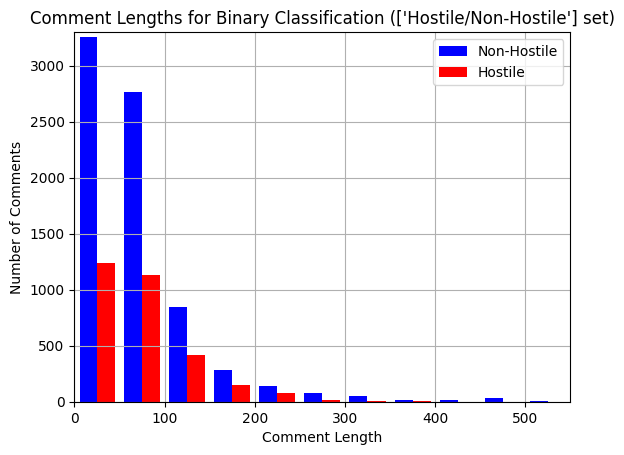

In [62]:
label=['Hostile/Non-Hostile']
comments_length_binary(df,label )

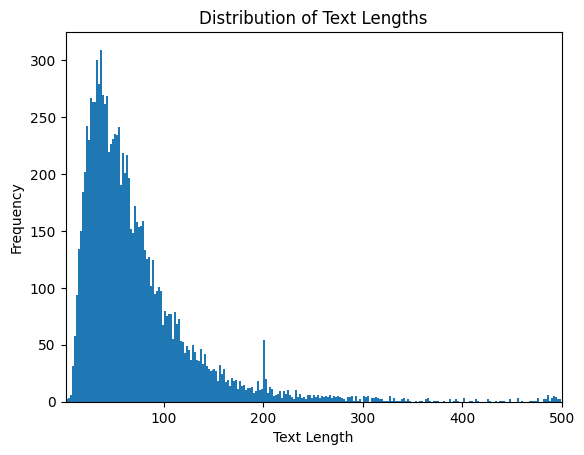

In [63]:
import matplotlib.pyplot as plt

# Calculate the length of each text in a column
text_lengths = df['Text'].apply(len)

# Set the number of bins to 500
num_bins = 1000



# Determine the range of text lengths
max_length = text_lengths.max()
min_length = text_lengths.min()

# Calculate the bin width
bin_width = (max_length - min_length) / num_bins

# Create a histogram of text lengths with 500 bins
plt.hist(text_lengths, bins=num_bins)
plt.xlim(1, 500)

# Add labels and title
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')

# Display the chart
plt.show()


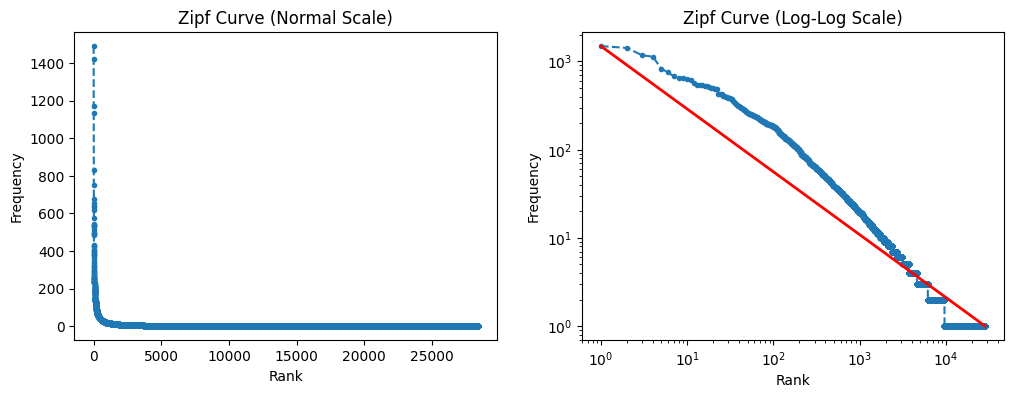

In [92]:
import matplotlib.pyplot as plt

# Calculate the word frequencies
word_counts = df['Text'].str.split(expand=True).stack().value_counts()

# Get the ranks
ranks = range(1, len(word_counts)+1)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the Zipf curve on a normal scale
axs[0].plot(ranks, word_counts ,marker='o', linestyle='--', markersize=3)
axs[0].set_xlabel('Rank')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Zipf Curve (Normal Scale)')

# Plot the Zipf curve on a log-log scale
axs[1].loglog(ranks, word_counts,marker='o', linestyle='--', markersize=3)
axs[1].set_xlabel('Rank')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Zipf Curve (Log-Log Scale)')

max_x = max(ranks)
max_y = max(word_counts)
axs[1].plot([1, max_x], [max_y, 1], 'r', linewidth=2)

# Display the chart
plt.show()


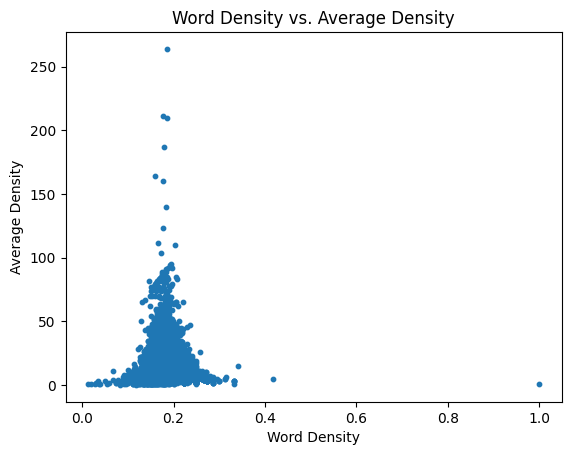

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the word density and average density for each row
df['Word Density'] = df['Text'].apply(lambda x: len(x.split()) / len(x))
df['Average Density'] = df['Text'].apply(lambda x: len(x.split()) / len(x.split('.')))

# Create a scatter plot of the data
plt.scatter(df['Word Density'], df['Average Density'], s=10)

# Add labels and title
plt.xlabel('Word Density')
plt.ylabel('Average Density')
plt.title('Word Density vs. Average Density')

# Display the plot
plt.show()


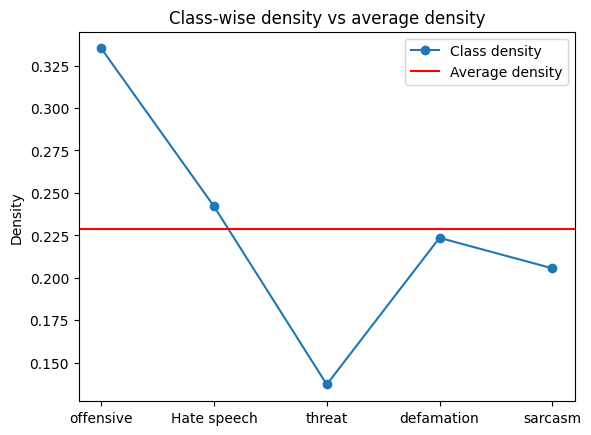

In [100]:
import pandas as pd
import numpy as np

# Load the dataset into a pandas dataframe


# Get the labels and the text data
labels = df.iloc[:, 3:8].values
text_data = df.iloc[:, 0].values

# Create a binary matrix Y where each row represents a sample and each column represents a class
Y = np.zeros((labels.shape[0], labels.shape[1]), dtype=int)
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        if labels[i,j] == 1:
            Y[i,j] = 1

# Compute the density of each class
class_densities = np.sum(Y, axis=0) / Y.shape[0]

# Compute the average density
avg_density = np.mean(class_densities)

# Plot the results
import matplotlib.pyplot as plt
plt.plot(range(5), class_densities, '-o', label='Class density')
# plt.bar(range(6), class_densities)
plt.axhline(y=avg_density, color='r', label='Average density')
plt.xticks(range(5), [ 'offensive', 'Hate speech', 'threat', 'defamation', 'sarcasm'])
plt.ylabel('Density')
plt.title('Class-wise density vs average density')
plt.legend()
plt.show()


In [111]:
from sklearn.metrics import cohen_kappa_score

# true label
df['threat']
# calculate Cohen's Kappa value
kappa = cohen_kappa_score(df['defamation'], df['defamation'])
print("Cohen's Kappa value:", kappa)

Cohen's Kappa value: 1.0
